In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dia.csv')

In [47]:
df.shape
df.drop(columns="Unnamed: 0",inplace=True)

In [48]:
df_train = df.iloc[0:40000,:]

In [49]:
df_train.shape

(40000, 10)

In [50]:
df_test = df.iloc[40000:53940,:]

In [51]:
df_test.shape

(13940, 10)

In [52]:
df_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [53]:
df_train.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
39995,0.41,Ideal,F,VS2,62.6,57.0,1107,4.79,4.76,2.99
39996,0.41,Ideal,F,VS2,61.8,56.0,1107,4.79,4.76,2.95
39997,0.41,Premium,F,VS2,61.6,59.0,1107,4.77,4.74,2.93
39998,0.41,Ideal,F,VS2,60.9,57.0,1107,4.78,4.74,2.90
39999,0.41,Ideal,F,VS2,62.1,56.0,1107,4.79,4.74,2.96


In [54]:
df_train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [55]:
df.value_counts()

carat  cut      color  clarity  depth  table  price  x      y      z   
0.79   Ideal    G      SI1      62.3   57.0   2898   5.90   5.85   3.66    5
0.50   Premium  D      SI2      62.9   58.0   997    5.06   5.01   3.17    2
1.20   Premium  I      VS2      62.6   58.0   5699   6.77   6.72   4.22    2
0.52   Ideal    D      VS2      61.8   55.0   1822   5.16   5.19   3.20    2
0.41   Ideal    G      IF       61.7   56.0   1367   4.77   4.80   2.95    2
                                                                          ..
0.50   Ideal    E      VS1      61.9   56.0   1716   5.09   5.12   3.16    1
                                62.0   58.0   1755   5.09   5.14   3.17    1
                                62.2   54.0   1665   5.10   5.13   3.18    1
                                       56.0   1619   5.10   5.13   3.18    1
5.01   Fair     J      I1       65.5   59.0   18018  10.74  10.54  6.98    1
Length: 53794, dtype: int64

In [56]:
X = df_train.drop('price', axis = 'columns')
y = df_train[['price']]

In [57]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(exclude = np.number)

In [58]:
X_num.shape,X_cat.shape

((40000, 6), (40000, 3))

In [59]:
X_num.mean()

carat     0.881150
depth    61.764332
table    57.508563
x         5.900053
y         5.901919
z         3.642594
dtype: float64

In [60]:
X_num.median()

carat     0.91
depth    61.90
table    57.00
x         6.19
y         6.20
z         3.85
dtype: float64

In [61]:
X_num.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [62]:
X_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [63]:
X_cat.mode()

,cut,color,clarity
0,Ideal,G,SI1


In [64]:
import seaborn as sns
sns.pairplot(df_train)

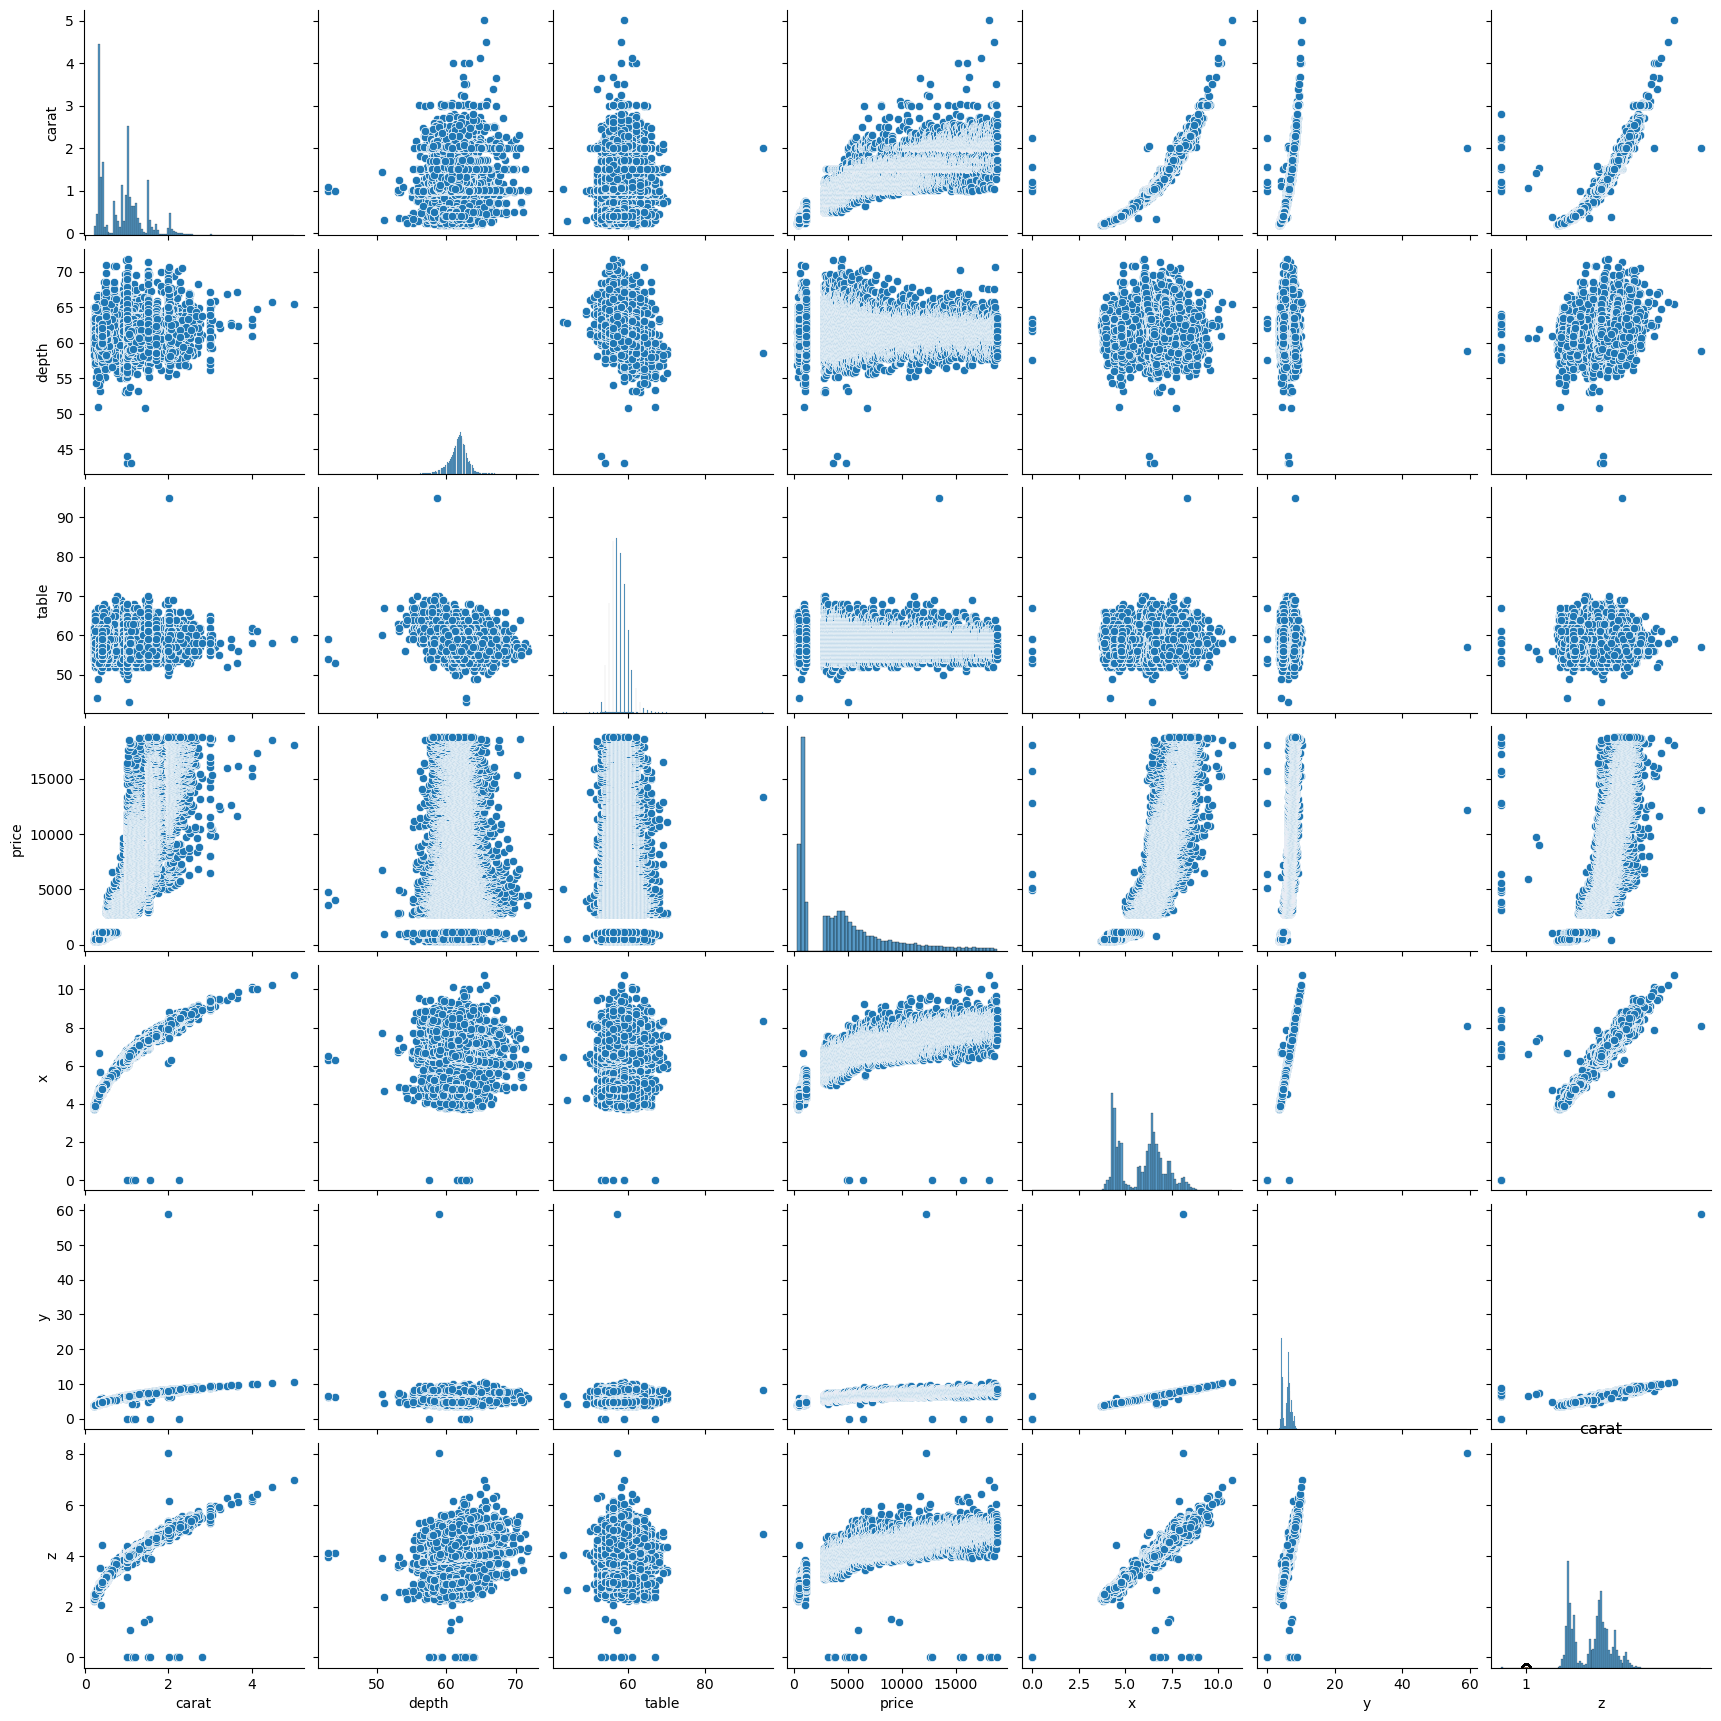

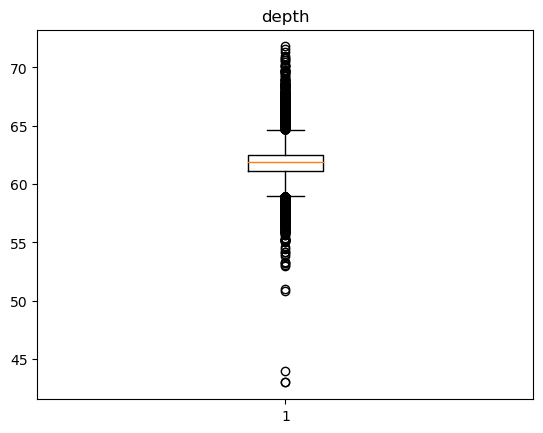

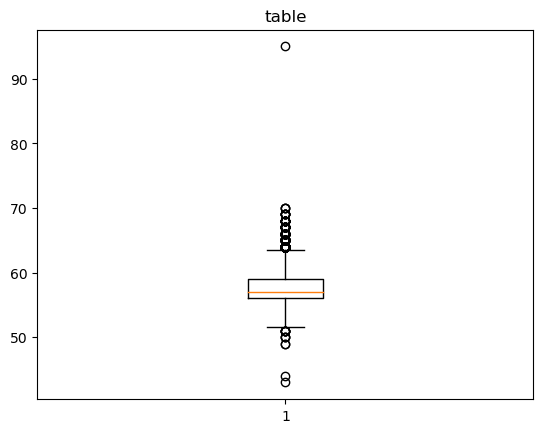

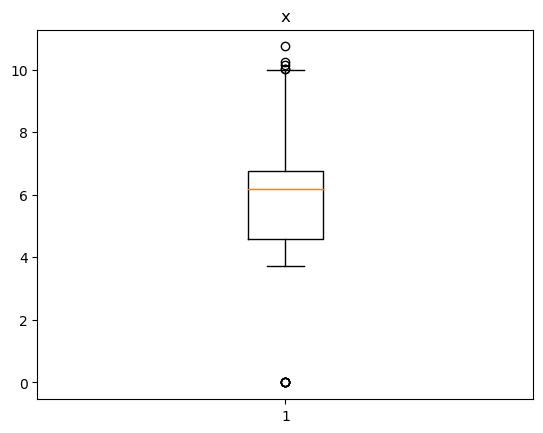

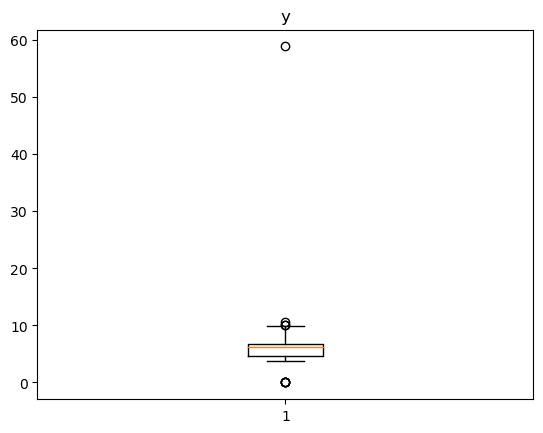

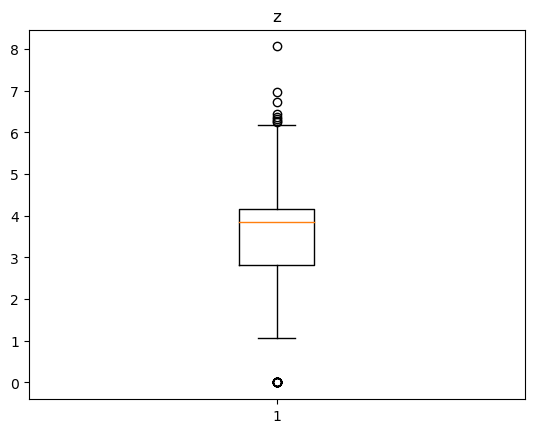

In [65]:
for i in X_num.columns:
    plt.boxplot(df_train[i])
    plt.title(i)
    plt.show()

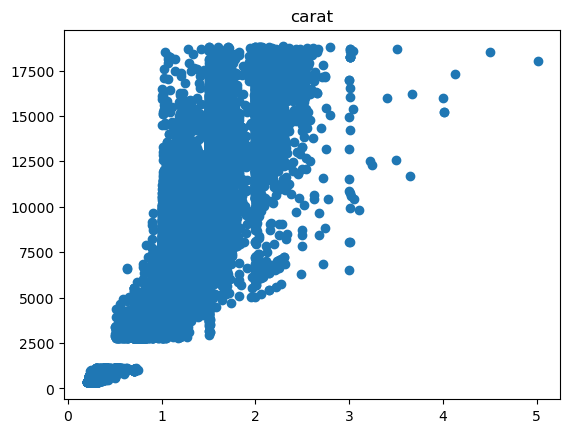

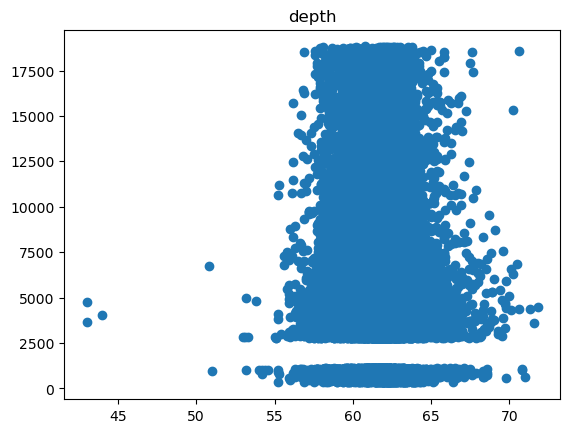

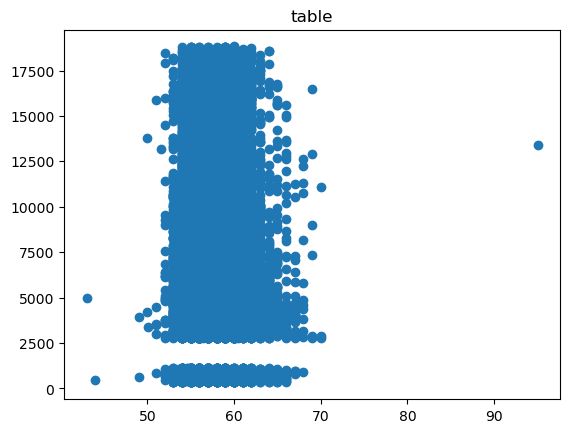

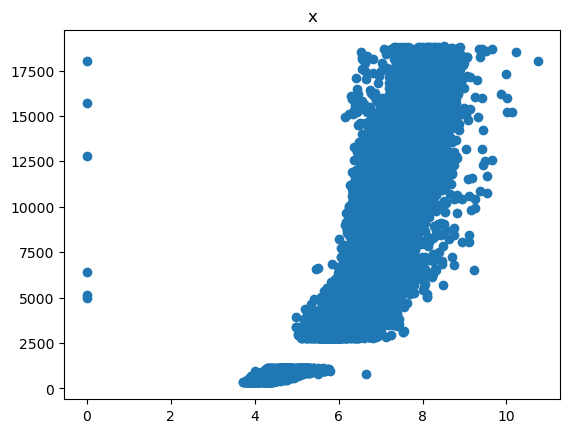

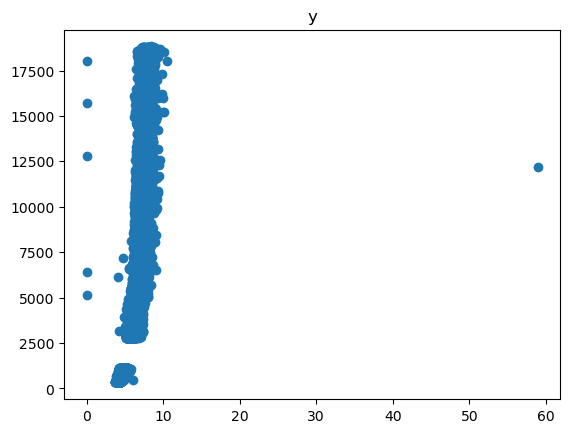

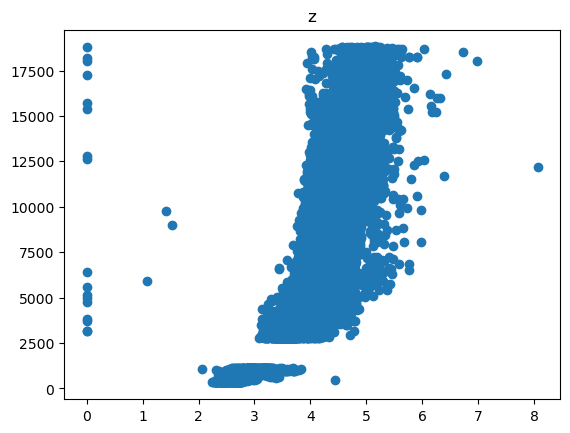

In [66]:
for i in X_num.columns:
    plt.scatter(df_train[i],df_train.price)
    plt.title(i)
    plt.show()

In [67]:
q1 = X_num.quantile(0.25)
q2 = X_num.quantile(0.5)
q3 = X_num.quantile(0.75)
IQR = q3 - q1
print(IQR)

carat    0.82
depth    1.40
table    3.00
x        2.16
y        2.14
z        1.34
dtype: float64


In [68]:
upper_lim = q1 - (1.5*IQR)
lower_lim = q2 + (1.5*IQR)

In [69]:
df_train[((df_train < lower_lim) | (df_train > upper_lim))]

C:\Users\jivit\AppData\Local\Temp\ipykernel_320\1137119853.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_train[((df_train < lower_lim) | (df_train > upper_lim))]


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,NaN,NaN,NaN,61.5,55.0,NaN,3.95,3.98,2.43
1,0.21,NaN,NaN,NaN,59.8,61.0,NaN,3.89,3.84,2.31
2,0.23,NaN,NaN,NaN,56.9,65.0,NaN,4.05,4.07,2.31
3,0.29,NaN,NaN,NaN,62.4,58.0,NaN,4.20,4.23,2.63
4,0.31,NaN,NaN,NaN,63.3,58.0,NaN,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
39995,0.41,NaN,NaN,NaN,62.6,57.0,NaN,4.79,4.76,2.99
39996,0.41,NaN,NaN,NaN,61.8,56.0,NaN,4.79,4.76,2.95
39997,0.41,NaN,NaN,NaN,61.6,59.0,NaN,4.77,4.74,2.93
39998,0.41,NaN,NaN,NaN,60.9,57.0,NaN,4.78,4.74,2.90


In [70]:
X_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [71]:
X_cat_encoded = pd.get_dummies(X_cat,columns = ['cut', 'color', 'clarity'], drop_first = True)

In [72]:
X_cat_encoded.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
mms = MinMaxScaler()
X_num_scaled = mms.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)
X_num_scaled.columns = X_num.columns

In [75]:
X_num_scaled.head()
X_num_scaled.drop(columns="Unnamed: 0",inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
X = pd.concat([X_cat_encoded,X_num_scaled],axis = 'columns')

In [ ]:
X.columns

In [76]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [77]:
X.shape

(40000, 9)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test  = train_test_split(X,y)

In [80]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30000, 9), (10000, 9), (30000, 1), (10000, 1))

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

In [82]:
lr = LinearRegression()
model_lr = lr.fit(X,y)

ValueError: could not convert string to float: 'Ideal'

In [83]:
train_preds = model_lr.predict(X_train)
train_mape = mape(y_train,train_preds)
print(train_mape)

C:\Users\jivit\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- clarity
- color
- cut
Feature names seen at fit time, yet now missing:
- clarity_IF
- clarity_SI1
- clarity_SI2
- clarity_VS1
- clarity_VS2
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Premium'

In [84]:
test_preds = model_lr.predict(X_test)
test_mape = mape(y_test,test_preds)
print(test_mape)

C:\Users\jivit\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- clarity
- color
- cut
Feature names seen at fit time, yet now missing:
- clarity_IF
- clarity_SI1
- clarity_SI2
- clarity_VS1
- clarity_VS2
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Very Good'

In [85]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=200, max_depth=12)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("The MAPE of the model is: ",mape(y_test, y_pred))

ValueError: could not convert string to float: 'Premium'

In [86]:
train_preds = model.predict(X_train)
train_mape = mape(y_train,train_preds)
print(train_mape)

ValueError: could not convert string to float: 'Premium'

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=200, max_depth=12)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("The MAPE of the model is: ",mape(y_test, y_pred))

ValueError: could not convert string to float: 'Premium'

In [88]:
train_preds = model.predict(X_train)
train_mape = mape(y_train,train_preds)
print(train_mape)

ValueError: could not convert string to float: 'Premium'